In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data processing 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

df= df.iloc[:,2:]

In [3]:
df.sample(5)

,Age,EstimatedSalary,Purchased
40,27,17000,0
148,29,61000,0
93,29,28000,0
34,27,90000,0
230,35,147000,1


Applying Train Test Split 

In [4]:
from sklearn.model_selection import train_test_split as tts 

In [5]:
X_train,X_test,y_train,y_test = tts(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [6]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [8]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
# fit scaler  to the train set, it will Learn the Parameters
scaler.fit(X_train)

#  transform train and test sets 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


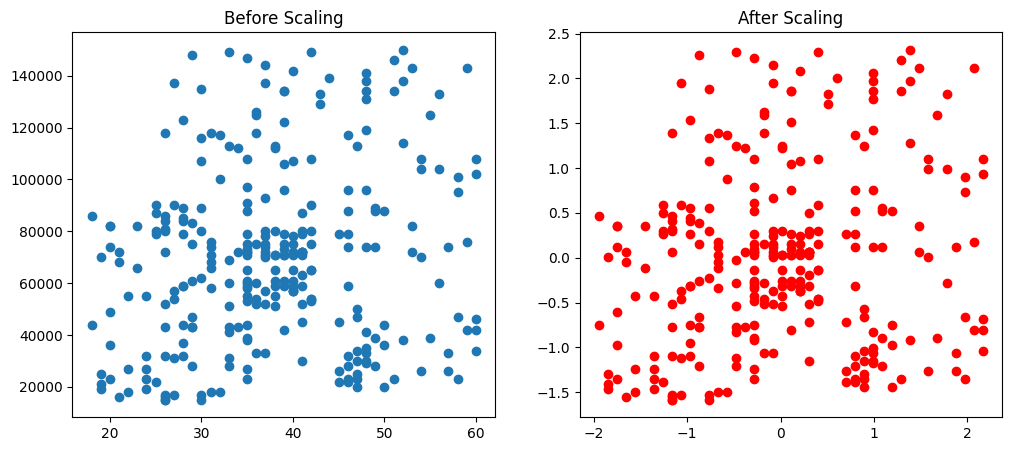

In [17]:
# Effect Of scaling 
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

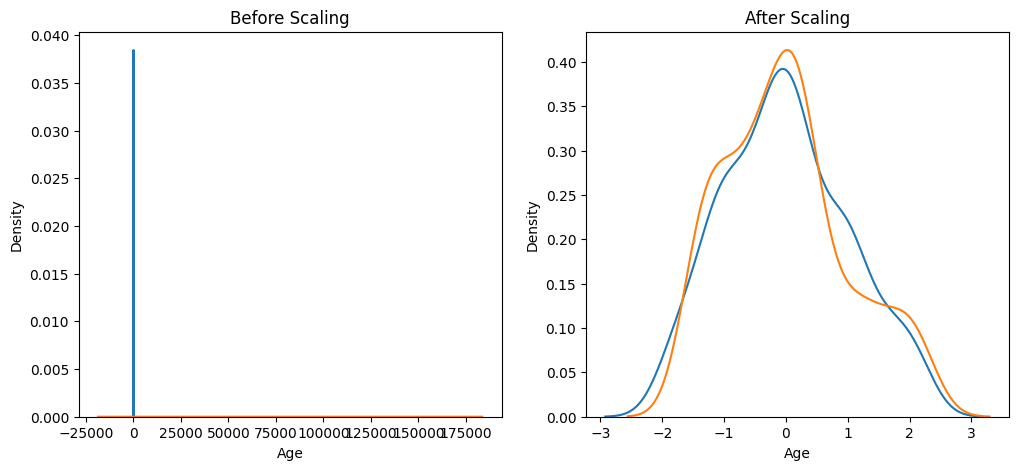

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scalinf
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()